In [71]:
import matplotlib.pyplot as plt

# Plot the feature accuracy with labels
def plot_feature_accuracy_with_labels(file_path, max_display=7, title="Feature Set Accuracy", max_label_len=20, len_features=50):
    feature_sets, accuracies = [], []
    with open(file_path) as f:
        for line in f:
            parts = line.strip().split("], ")
            
            feature_sets.append(parts[0]+"]")
            accuracies.append(float(parts[1]))
    
    # Get the number of feature sets
    n = len(feature_sets)

    # Get the all features
    all_features = set(range(len_features))

    # Make the label for the feature set
    def make_label(fs):
        s = str(fs)[1:-1].split(",")
        s = set(int(x.strip()) for x in s)
        if len(s) <= max_label_len:
            return s

        missing = sorted(all_features - s)
        if not missing:
            return "{All_features}"
        return f"{{All features}} - {missing}"

    if n <= max_display:
        labels = [make_label(fs) for fs in feature_sets]
        values = accuracies
    else:
        head = (max_display - 1) // 2
        tail = (max_display - 1) - head
        head_sets = feature_sets[:head]
        tail_sets = feature_sets[-tail:]
        labels = [make_label(fs) for fs in head_sets] + ["{omitted for space}"] + [make_label(fs) for fs in tail_sets] 
        values = accuracies[:head] + [None] + accuracies[-tail:]

    plt.figure(figsize=(10, 5))
    for i, v in enumerate(values):
        if v is not None:
            plt.bar(i, v, color='gray')
    plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


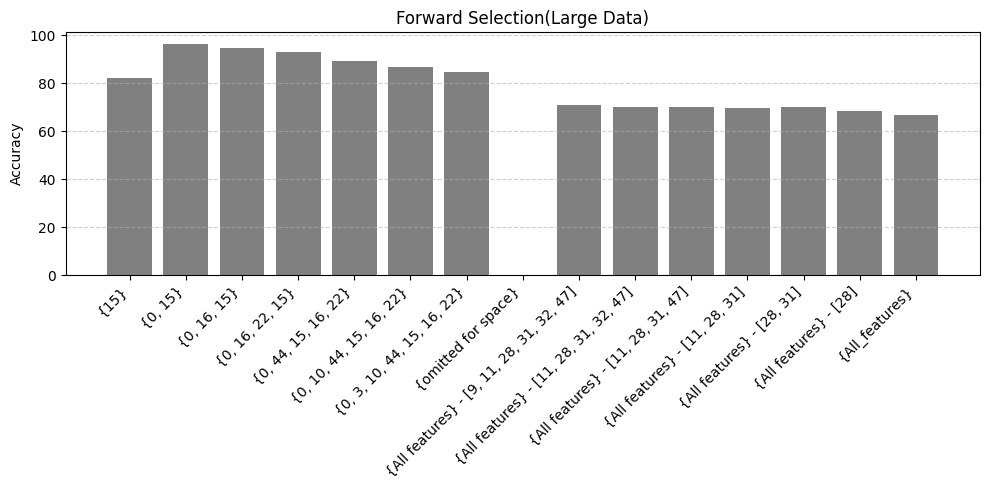

In [ ]:
# Forward Selection (Large Data)
plot_feature_accuracy_with_labels("logs/forward_large_accuracy_output.txt", max_display=15, title="Forward Selection(Large Data)")


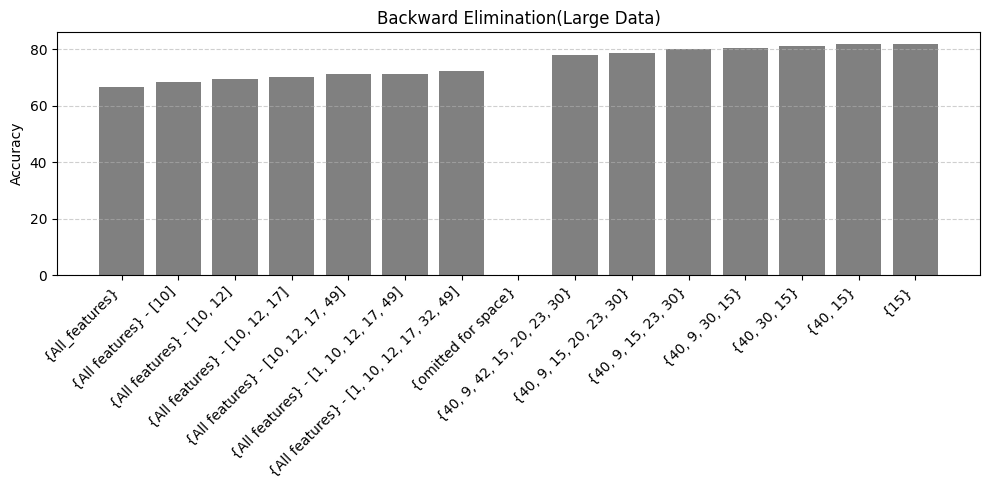

In [73]:
# Backward Elimination (Large Data)
plot_feature_accuracy_with_labels("logs/backward_large_accuracy_output.txt", max_display=15, title="Backward Elimination(Large Data)")

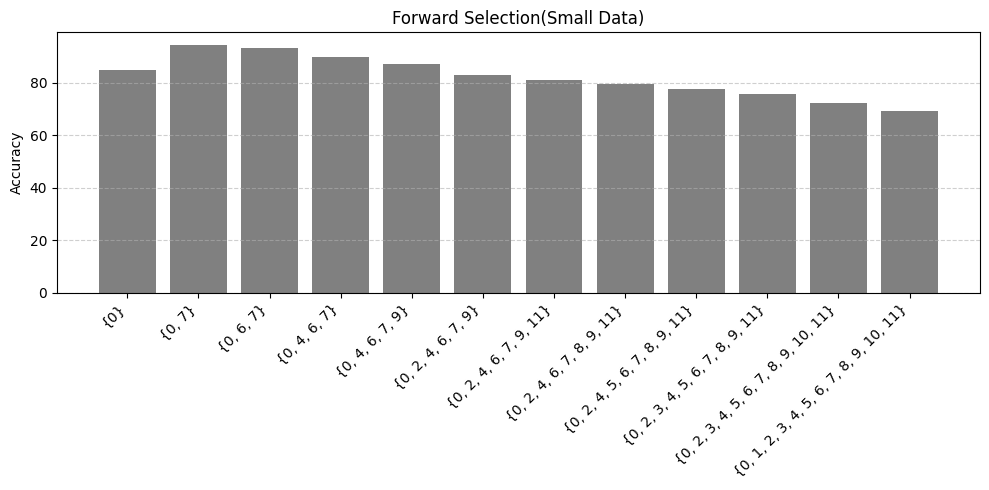

In [ ]:
# Forward Selection (Small Data)
plot_feature_accuracy_with_labels("logs/forward_small_accuracy_output.txt", max_display=15, title="Forward Selection(Small Data)", max_label_len=15, len_features=12)

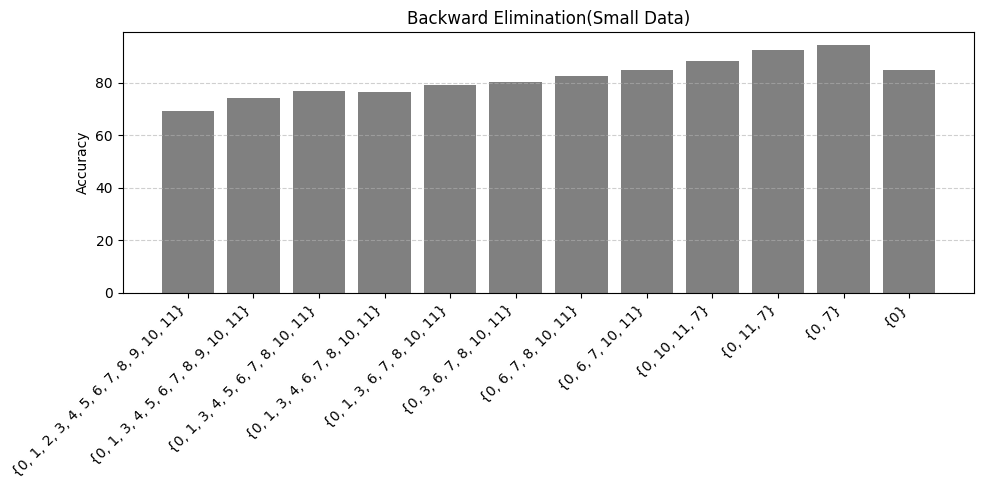

In [75]:
# Backward Elimination (Small Data)
plot_feature_accuracy_with_labels("logs/backward_small_accuracy_output.txt", max_display=15, title="Backward Elimination(Small Data)",  max_label_len=15, len_features=12)

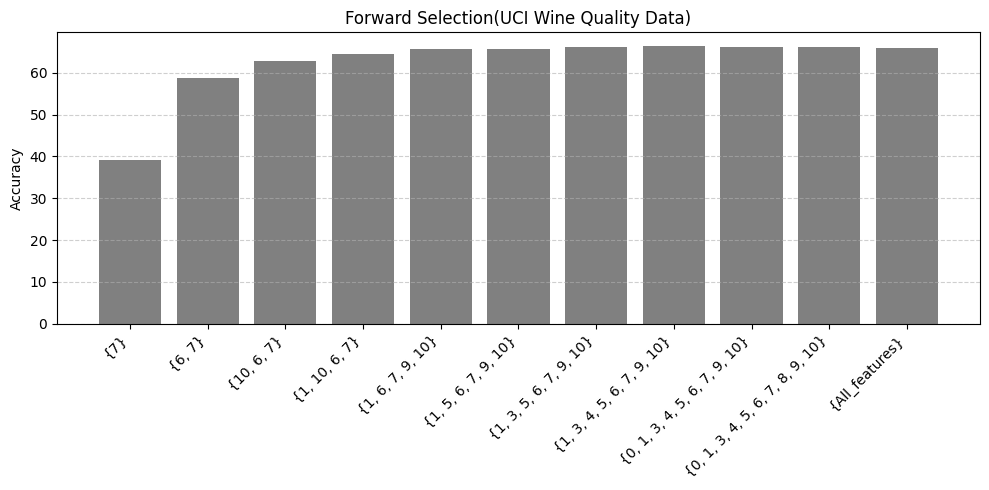

In [ ]:
# Forward Selection (UCI Wine Quality Data)
plot_feature_accuracy_with_labels("logs/UCI_forward_accuracy_output.txt", max_display=15, title="Forward Selection(UCI Wine Quality Data)", max_label_len=10, len_features=11)

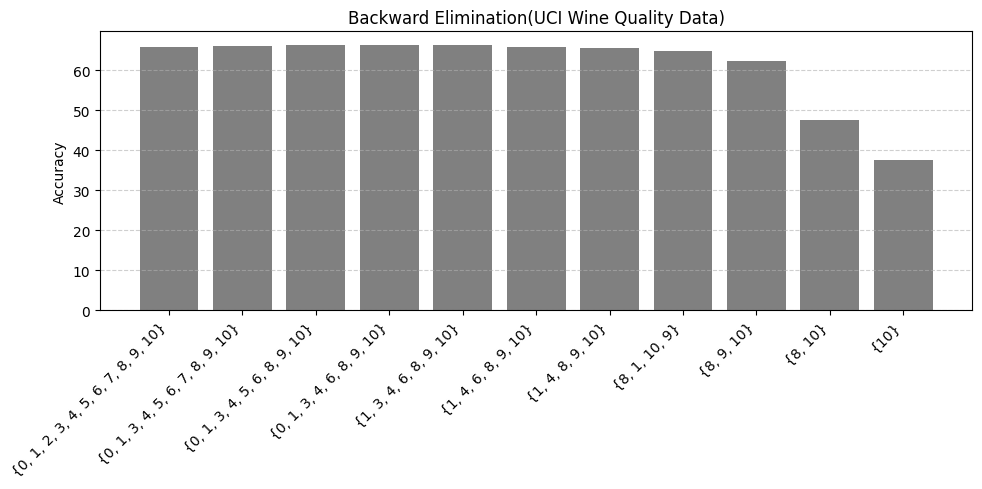

In [ ]:
# Backward Elimination (UCI Wine Quality Data)
plot_feature_accuracy_with_labels("logs/UCI_backward_accuracy_output.txt", max_display=15, title="Backward Elimination(UCI Wine Quality Data)", max_label_len=15, len_features=11)

In [85]:
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id=186)
X = dataset.data.features
y = dataset.data.targets

In [90]:
y['quality'].unique()


array([5, 6, 7, 4, 8, 3, 9])